# Introduction to Data Science
## Homework 3 Solutions

### Part 1 - Preparing a Training Set and Training a Decision Tree (Total 10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [1]:
# importing the required package
import pandas as pd

# loading the data set into a Pandas DataFrame
df = pd.read_csv('cell2cell_data.csv')

# spliting the data into training and testing
train_df = df.sample(frac=0.8)
test_df = df.loc[~df.index.isin(train_df.index)]

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

(1 Point)

<p>
<span style="color:blue">
A test for sampling bias can be performed to prove that our data was randomly sampled, which basically tests if the sample data is actually a representative of the entire dataset, and there is no bias in selection of the sample data. There are many tests that can be used to prove the randomness of the data. One of them is Heckman correction which is very useful to test for a sample selection bias. Although not required here, but it also provides a way to correct the non-randomly selected sampled data.
</span>
</p>

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [2]:
from sklearn.tree import DecisionTreeClassifier

# building a decison tree classifier
dtc = DecisionTreeClassifier(criterion='entropy')

train_data = train_df.T[:11].T
train_target = train_df.churndep

# training the decision tree classifier
dtc.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

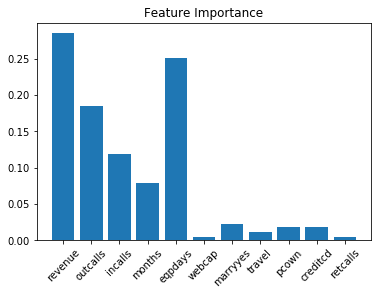

In [3]:
# importing the required package
import matplotlib.pyplot as plt

features = range(len(df.columns[:11]))

# print(dtc.feature_importances_)

# creating the bar plot of feature names and their feature importance
plt.bar(features, dtc.feature_importances_)
plt.xticks(features, df.columns, rotation=45)
plt.title('Feature Importance')

# showing the bar plot
plt.show()

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

In [4]:
data = df.corr()

top_features = ['revenue','outcalls','eqpdays','churndep']

for feature in data.index.values:
    if feature not in top_features:
        # removing the columns which are not in top 3 most important features
        del data[feature]
        # removing the rows which are not in top 3 most important features
        data.drop(feature, inplace=True)

data

,revenue,outcalls,eqpdays,churndep
revenue,1.000000,0.500870,-0.221958,-0.013566
outcalls,0.500870,1.000000,-0.243999,-0.037233
eqpdays,-0.221958,-0.243999,1.000000,0.112731
churndep,-0.013566,-0.037233,0.112731,1.000000


<p>
<span style="color:blue">
The relationship between revenue and outcalls is positive, between revenue and eqpdays in negative, and that between outcalls and eqpdays is also negative. The customer that are making more outgoing calls contribute more to the revenue, and also they have recently got their current equiptment, whereas those customers who are contributing less in revenue are using their current equipment from many months (or years in some cases). The customers who having recently got their current equipment (i.e. they are using their current equipment from relatively less number of days) are making high number of outgoing calls. Although the magnitude of the correlation of these top 3 features with churndep is very less, indicating that there is a very less relationship among them. <br> <br>
Considering the data is from a telecom/carrier provider, a customer who makes high outgoing calls and is in high revenue, does not churn the provider as long as the service is good, whereas the people in low revenue may churn the provider due to high service charges. Similarly the customers who recently got their current equipment are highly unlikely to churn the provider.
</span>
</p>

6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

(1 Point)

In [5]:
# importing the required package
from sklearn.metrics import accuracy_score

test_data = test_df.T[:11].T
test_target = test_df.churndep

train_target_predict = dtc.predict(train_data)
test_target_predict = dtc.predict(test_data)

# calculating the accuracy on training and testing data sets
train_accuracy = accuracy_score(train_target, train_target_predict)
test_accuracy = accuracy_score(test_target, test_target_predict)

print("The accuracy on train_df is:", train_accuracy*100)
print("The accuracy on test_df is:", test_accuracy*100)

The accuracy on train_df is: 99.987455703
The accuracy on test_df is: 53.0481685901


### Part 2 - Finding a Good Decision Tree (Total 10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

In [6]:
min_split = [i*80 for i in range(2,12)]
min_leaf = [i*40 for i in range(1,11)]

print("Values for min_samples_split:", min_split)
print("Values for min_samples_leaf:", min_leaf)

Values for min_samples_split: [160, 240, 320, 400, 480, 560, 640, 720, 800, 880]
Values for min_samples_leaf: [40, 80, 120, 160, 200, 240, 280, 320, 360, 400]


2\. Explain in words your reasoning for choosing the above ranges.

(1 Points)

<p>
<span style="color:blue">
There are a total of 31,887 observations in the training set, and 11 features (or independent variables) in the cell2cell_data.csv dataset. This gave me a range of values till about 3000. I now tested these values to further narrow this range and determine optimal values for the parameters min_samples_split and min_samples_leaf, which lead me to good accuracy scores at about a configuration of 1% to 2% of the total number of obervations which is equivalent to approximately 200 to 700.
</span>
</p>

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

(5 Points)

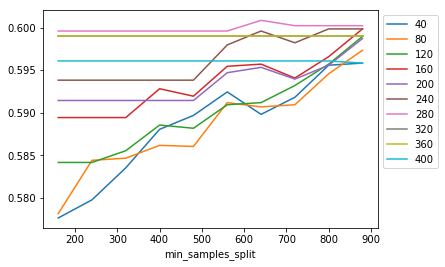

Best accuracy is 60.0852985449 at configuration: min_samples_split = 640 and min_samples_leaf = 280


In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

train_data = train_df.T[:11].T
train_target = train_df.churndep
best_accuracy = 0

test_data = test_df.T[:11].T
test_target = test_df.churndep

for leaf in min_leaf:
    test_accuracy = []
    for split in min_split:
        
        dt = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = split, min_samples_leaf = leaf)
        dt.fit(train_data, train_target)
        
        test_target_predict = dt.predict(test_data)
        score = accuracy_score(test_target, test_target_predict)
        test_accuracy.append(score)
        if score > best_accuracy:
            best_accuracy = score
            best_split = split
            best_leaf = leaf
        
    plt.plot(min_split, test_accuracy, label=leaf)

plt.xlabel("min_samples_split")
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

print("Best accuracy is " + str(best_accuracy*100) + " at configuration: min_samples_split = " + str(best_split) + " and min_samples_leaf = " + str(best_leaf))


4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

<p>
<span style="color:blue">
The best accuracy is 60.085% which is obtained by the following configuration: <br>
min_samples_split = 640 <br>
min_samples_leaf = 280
</span>
</p>

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

<p>
<span style="color:blue">
The churn production model can be a vital factor in policy or decision making process for most of the business environments. The churn model helps in obtaining the most relevant features that are a deciding factor for the churn, and using these features in the right way can help the company to avoid churning more customers.
<br><br>
If we consider a telecom provider like Verizon, they can use this churn model to predict and analyse the pattern for the customers who are leaving the company. If customers that are contributing more to the revenue of company, leave the company, then it indicates a high possibility of them not being satisfied with the service that is provided by the company. The company can use this data to improve the service in their region. On the other hand, there are some customers that feel the price of the service or product provided by the company is high. So the company can use this data to offer customized discounts to such customers on a periodic basis.
<br><br>
We can also consider an airline company, so an example for them could be that if their frequent customers who book first or business class tickets have recently stopped buying tickets from them, then the company should focus more on improving the services. Whereas if the frequent customers from economy class having recently stopped buying tickets, then it is highly likely that a discount offer or some other perk might interest those customers to start buying tickets from them.
<br><br>
Also, in some of the business environments, the age of the customer can be an important feature, so this data can be used to get adapt to new technologies can quickly help in fulfilling the customer's expectation, before they find an alternative. Hence, this model can be used to improve the churn by offering new products, improved service, and offer customized perks and discount coupons.
</span>
</p>

### Part 3 - Working with Time Series (Total 10 Points)
Here we will analyze a timeseries of number of Yellow Fever cases from a specific Asian country by year. The data is from 1700 – 2008.



1\. Load the timeseries data set, and prepare the dataset by converting the variables to date-time format (hint: use date tools). (1 point)

In [8]:
# importing the required package
import pandas as pd
from statsmodels.api import tsa

# loading the data set into a Pandas DataFrame
df = pd.read_csv('cases.csv')
# converting the variables to date-time format
df["YEAR"] = pd.Index(tsa.datetools.dates_from_range('1700', '2008'))

# another alternative to convert the variables to date-time format
# df["YEAR"] = pd.to_datetime(df["YEAR"], format='%Y')
# df["Time"] = df["YEAR"].dt.time

df

,YEAR,YFCASES
0,1700-12-31,5.0
1,1701-12-31,11.0
2,1702-12-31,16.0
3,1703-12-31,23.0
4,1704-12-31,36.0
5,1705-12-31,58.0
6,1706-12-31,29.0
7,1707-12-31,20.0
8,1708-12-31,10.0
9,1709-12-31,8.0


2\. Plot the autocorrelation function (ACF) and partial autocorrelation function (PCF) of the cases timeseries. (1 point)

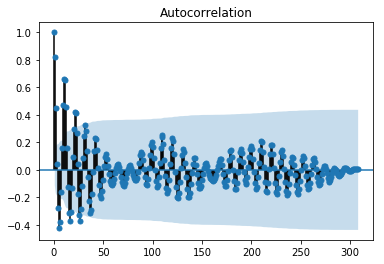

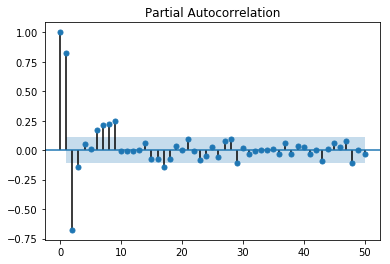

In [9]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

series = Series.from_csv('cases.csv', header=0)

plot_acf(series)
pyplot.show()

# setting lags = 50 so that the graph plot can be easily analysed
plot_pacf(series, lags=50)
pyplot.show()

3\. Describe what the plots indicate (in terms of autocorrelation and autoregressive parameter (p) and moving average (q)). 2 points.
Some rules of thumb to recall:<br>
Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter <br>
Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters. <br>
Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter. <br>
Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.<br>
Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.<br>


<p>
<span style="color:blue">
The autocorrelation (ACF) plot indicates a sine-wave shape pattern with 0.00 value occuring at about 75, then 160 and finally at 300. The partial autocorrelation (PACF) plot indicates no correlation except for spikes at lags 1 amd 2. This makes the value of autoregressive (p) parameter = 2, and moving average (q) parameter = 0. This verfies Rule 2 is followed by the given daatset 'cases.csv'. This makes the model as ARMA(2,0) with two autoregressive terms and no moving averages.
</span>
</p>

4\. Another approach to assessing the presence of autocorrelation is by using the  Durbin-Waton (DW) statistic. The value of the DW statistic is close to 2 if the errors are uncorrelated. What is DW for our data, and does this match what you observed from the ACF and PCF plots? (1 point) 

In [10]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(series)

print("Durbin Watson value : ", dw)
print()
print("The Durbin-Waston (DW) value for our data is", dw)
print("As the value is very less than 2, it indicates the presence of autocorrelation and signifies that the errors are correlated.")
print("This does match from what I observed from the ACF and PCF plots.")

Durbin Watson value :  0.139528926599

The Durbin-Waston (DW) value for our data is 0.139528926599
As the value is very less than 2, it indicates the presence of autocorrelation and signifies that the errors are correlated.
This does match from what I observed from the ACF and PCF plots.


5\. Removing serial dependency by modeling a simple ARMA process with p and q as derived above. Take a look at what the resulting process looks like (plot) (1 point)


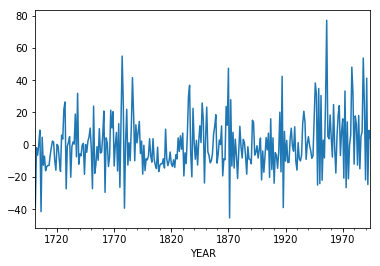

In [11]:
from statsmodels.tsa.arima_model import ARMA
from matplotlib import pyplot as plt

# slicing only the first 295 values (i.e. till the year 1994) for fitting the model,
# as I will be predicting the values from the year 1995 in question number 8.
model = ARMA(series[1:295], (2,0))
model_fit = model.fit()

residuals = model_fit.resid
residuals.plot()
plt.show()

6\. Calculate the residuals, and test the null hypothesis that the residuals come from a normal distribution, and construct a qq-plot. Do the results of the hypothesis test and qq-plot align? (1 point)



NormaltestResult(statistic=42.27884831203626, pvalue=6.595758387833176e-10)


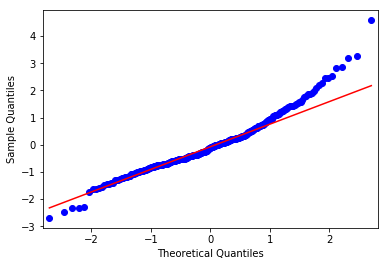

In [12]:
from scipy import stats
from statsmodels.graphics.api import qqplot

print(stats.normaltest(residuals))

fig = qqplot(residuals, line='q', fit=True)
plt.show()

<p>
<span style="color:blue">
The results from the qq-plot and hypothesis test signify that the residuals do not come from a normal distribution. This is also verfied from the qqplot by the drift in the values as they go on increasing. The pvalue which comes to be 6.59576e-10, indicating that the probability can be considered as negligible.
</span>
</p>


7\. Now investigate the autocorrelation of your ARMA(p,q) model. Did it improve?
These can be examined graphically, but a statistic will help.
Next, we calculate the lag, autocorrelation (AC), Q statistic and Prob>Q. 
The Ljung–Box Q test is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero. The null hypothesis is, H0: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process). (Hint: use qstat in tsa.acf).


In [13]:
from statsmodels.api import tsa
import numpy as np

print("Durbin Watson value :", durbin_watson(residuals))

r,q,p = tsa.acf(residuals.values.squeeze(), qstat=True)
stat = np.c_[range(1,41), r[1:], q, p]
result = pd.DataFrame(stat, columns=["lag", "autocorrelation AC", "Q statistic", "Prob(>Q)"])
result.set_index("lag")

Durbin Watson value : 2.14005974438


,autocorrelation AC,Q statistic,Prob(>Q)
lag,,,
1.0,-0.079049,1.855919,0.173097
2.0,0.099641,4.814862,0.090046
3.0,-0.026170,5.019681,0.170362
4.0,0.079192,6.901603,0.141180
5.0,0.045528,7.525756,0.184382
6.0,0.011039,7.562581,0.271932
7.0,0.043121,8.126398,0.321580
8.0,-0.016308,8.207317,0.413485
9.0,0.179453,18.040541,0.034706


<p>
<span style="color:blue">
The autocorrelation of the ARMA(p,q) model has improved as the value of Durbin Watson is now 2.14 which is closer to 2. This indicates that the errors are uncorrelated and there is no presence of autocorrelation in the residual data.
</span>
</p>

8\. Compute prediction for years 2009-2012 and analyze their fit against actual values. (1 point)



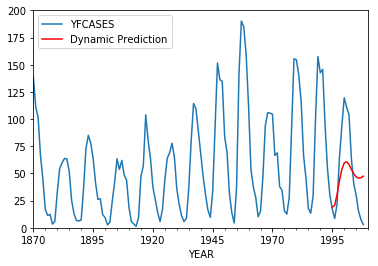

In [14]:
# predicting the values of YFCASES for the years 1995 to 2008 and fitting them against actual values from the given dataset.
pred = model_fit.predict('1995', '2008', dynamic=True)

graph = series.plot()
graph = pred.plot(ax=graph, style='r', label='Dynamic Prediction');
graph.legend()
graph.axis((-100, 40, 0, 200))

# The red color in the graph shows the predicted values from the year 1995 which is analysed
# against the actual values from the dataset (shown in blue color in the graph below)

plt.show()

9\. Calculate the forecast error via MAE and MFE.  (2 points)
Reminders:
Mean absolute error: The mean absolute error (MAE) value is computed as the average absolute error value. If MAE is zero the forecast is perfect. As compared to the mean squared error (MSE), this measure of fit “de-emphasizes” outliers (unique or rare large error values will affect the MAE less than the MSE.

Mean Forecast Error (MFE, also known as Bias). The MFE is the average error in the observations. A large positive MFE means that the forecast is undershooting the actual observations. A large negative MFE means the forecast is overshooting the actual observations. A value near zero is ideal, and generally a small value means a pretty good fit. 

The MAE is a better indicator of fit than the MFE.



In [15]:
mean_forecast_error = series.sub(pred).mean()
mean_absolute_error = np.mean((np.abs(series.sub(pred).mean()) / pred))

print("Mean Forecast Error =", mean_forecast_error)
print("Mean Absolute Error =", mean_absolute_error)

Mean Forecast Error = 4.602150057001623
Mean Absolute Error = 0.1153729313228569
